In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/EnggQasim/UIT/master/Deep_Learning/Chapter1/data/weight-height.csv")

In [5]:
df.sample(5)

,Gender,Height,Weight
7253,Female,64.715292,143.939717
1319,Male,70.404436,193.856769
5868,Female,58.376812,96.579212
6634,Female,63.806045,145.429650
9884,Female,61.808434,121.339602


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
X = df.Height.values # input, data
y_true = df.Weight.values #output, labels, Asnwers

print(X[:5], y_true[:5], sep='\n\n')

[73.84701702 68.78190405 74.11010539 71.7309784  69.88179586]

[241.89356318 162.31047252 212.74085556 220.0424703  206.34980062]


In [9]:
#line Equation
def line(x, w=0, b=0):
    return x * w + b

#Cost Functions
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

Text(0.5, 0, 'b')

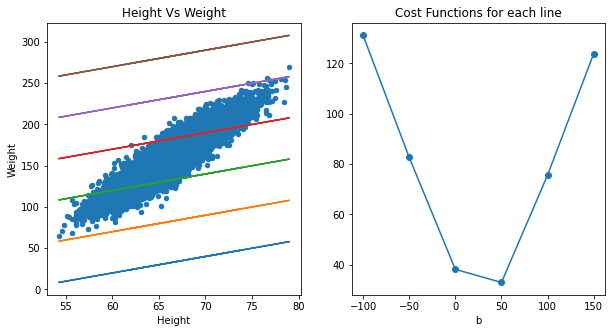

In [10]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121) # rows,columns, select column 121
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight", ax=ax1)


bs = [-100, -50, 0, 50, 100, 150]

mses = []
for b in bs:
    y_pred = line(X, w=2, b=b) # predict line
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred) 
    
    
ax2 = plt.subplot(122)    
plt.plot(bs, mses, 'o-')
plt.title("Cost Functions for each line")
plt.xlabel("b")

In [11]:
print(bs)
print(mses)

[-100, -50, 0, 50, 100, 150]
[131.1417931672291, 82.62957208407575, 38.172273320810234, 32.96359686320369, 75.60472859445356, 123.87716195296917]


#Try to find w and b (weights) with Deep Learning

In [12]:
from tensorflow.keras.models import Sequential #sequential, Functional API
from tensorflow.keras.layers import Dense #each nodes connected with others nodes
from tensorflow.keras.optimizers import Adam, SGD

In [13]:
import tensorflow
tensorflow.__version__

'2.8.2'

In [14]:
print(X[:2],
     y_pred[:2], sep="\n")

[73.84701702 68.78190405]
[297.69403404 287.56380809]


In [15]:
model = Sequential()
model.add(Dense(1,input_shape=(1,)))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(Adam(lr=0.8),loss="mean_squared_error")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
model.fit(X,y_true,epochs=50)

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 552.5177
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 516.2924
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 459.9991
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 422.7213
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 360.9113
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 337.9714
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 300.4902
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 279.6262
Epoch 9/50
313/313 [==============================] - 1s 2ms/step - loss: 251.4637
Epoch 10/50
313/313 [==============================] - 1s 2ms/step - loss: 240.9788
Epoch 11/50
313/313 [==============================] - 1s 2ms/step - loss: 223.9108
Epoch 12/50
313/313 [==============================] - 1s 2ms/step - loss: 207.9100
E

In [21]:
y_pred = model.predict(X)

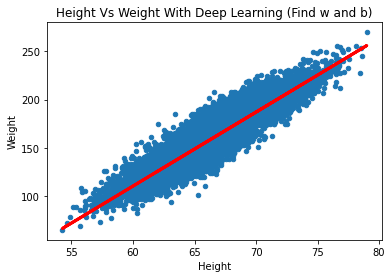

In [22]:
df.plot(kind='scatter',
       x='Height',
       y="Weight",
       title="Height Vs Weight With Deep Learning (Find w and b)")
plt.plot(X, y_pred, color='red', linewidth=3)

In [23]:
model.get_weights()

[array([[7.6817446]], dtype=float32), array([-350.65726], dtype=float32)]